<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/computational_chemistry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hydrogen H₂**

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_5000.png)

In [1]:
!pip install pyscf geometric -q
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian, dft, tddft, mp, cc
from pyscf.geomopt.geometric_solver import optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.0/386.0 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 11.3 MB/s eta 0:00:00


##### *Define Molecule*

In [25]:
# Hydrogen (H₂)
mol = gto.Mole()
mol.atom = '''
    H  0.00 0.00  0.00
    H  0.00 0.00  0.74
'''
molecule = 'Hydrogen (H₂)' # Name

In [ ]:
# Water (H₂O)
mol = gto.Mole()
mol.atom = '''
    O  0.000000  0.000000  0.000000
    H  0.000000  0.757000  0.586000
    H  0.000000 -0.757000  0.586000
'''
molecule = 'Water (H₂O)'

In [ ]:
# Oxygen (O₂)
mol = gto.Mole()
mol.atom = '''
    O  0.00 0.00  0.00
    O  0.00 0.00  1.21
'''
molecule = 'Oxygen (O₂)'

In [ ]:
# Methane (CH₄)
mol = gto.Mole()
mol.atom = '''
    C  0.000000  0.000000  0.000000
    H  0.629118  0.629118  0.629118
    H -0.629118 -0.629118  0.629118
    H -0.629118  0.629118 -0.629118
    H  0.629118 -0.629118 -0.629118
'''
molecule = 'Methane (CH₄)'

In [ ]:
# Helium (He)
mol = gto.Mole()
mol.atom = '''
    He 0.00 0.00 0.00
'''
molecule = 'Helium (He)'

In [ ]:
# Nitrous Oxide (N₂O)
mol = gto.Mole()
mol.atom = '''
    N  0.00000000  0.00000000  -1.25324312
    N  0.00000000  0.00000000  -0.12244312
    O  0.00000000  0.00000000   1.06565688
'''
molecule = 'Nitrous Oxide (N₂O)'

In [ ]:
# Benzene (C₆H₆)
mol = gto.Mole()
mol.atom = '''
    C    0.000000    1.396763    0.000000
    C    1.209587    0.698382    0.000000
    C    1.209587   -0.698382    0.000000
    C    0.000000   -1.396763    0.000000
    C   -1.209587   -0.698382    0.000000
    C   -1.209587    0.698382    0.000000
    H    0.000000    2.480310    0.000000
    H    2.146325    1.240155    0.000000
    H    2.146325   -1.240155    0.000000
    H    0.000000   -2.480310    0.000000
    H   -2.146325   -1.240155    0.000000
    H   -2.146325    1.240155    0.000000
'''
molecule = 'Benzene (C₆H₆)'

In [ ]:
# Carbon Dioxide (CO₂)
mol = gto.Mole()
mol.atom = '''
    C   0.0000000   0.0000000   0.0000000
    O   0.0000000   0.0000000   1.1600000
    O   0.0000000   0.0000000  -1.1600000
'''
molecule = 'Carbon Dioxide (CO₂)'

In [ ]:
# Methyl Chloride (CH₃Cl)
mol = gto.Mole()
mol.atom = '''
    C   0.00000000   0.00000000   0.45520100
    Cl  0.00000000   0.00000000  -1.31979900
    H   0.00000000   1.02669100   0.82520000
    H   0.88910000  -0.51334500   0.82520000
    H  -0.88910000  -0.51334500   0.82520000
'''
molecule = 'Methyl Chloride (CH₃Cl)'

In [ ]:
# Ammonia (NH₃)
mol = gto.Mole()
mol.atom = '''
    N  0.0000  0.0000  0.2000
    H  0.0000  0.9433 -0.2000
    H  0.8165 -0.4717 -0.2000
    H -0.8165 -0.4717 -0.2000
'''
molecule = 'Ammonia (NH₃)'

In [41]:
# Phosphine (PH₃)
mol = gto.Mole()
mol.atom = '''
    P   0.00000000   0.00000000   0.24580000
    H   1.21850000   0.00000000  -0.57350000
    H  -0.60925000   1.05520000  -0.57350000
    H  -0.60925000  -1.05520000  -0.57350000
'''
molecule = 'Phosphine (PH₃)'

In [ ]:
# Dimethyl Sulfide (DMS) (CH₃)₂S
mol = gto.Mole()
mol.atom = '''
    S   0.00000000   0.46519300   0.00000000
    C  -1.50853500  -0.34759700   0.00000000
    H  -1.48831900  -1.00619800   0.87783900
    H  -1.48831900  -1.00619800  -0.87783900
    H  -2.45862400   0.18760200   0.00000000
    C   1.50853500  -0.34759700   0.00000000
    H   1.48831900  -1.00619800   0.87783900
    H   2.45862400   0.18760200   0.00000000
    H   1.48831900  -1.00619800  -0.87783900
'''
molecule = 'Dimethyl Sulfide (DMS) (CH₃)₂S'

In [ ]:
# Dimethyl Disulfide (DMDS) (CH₃S)₂
mol = gto.Mole()
mol.atom = '''
    C  -1.579679   0.849405  -0.177006
    H  -1.516541   1.264210   0.829033
    H  -2.529898   0.315926  -0.297427
    H  -1.554032   1.528773  -1.031526
    S  -0.288210  -0.528464  -0.126027
    S   0.887210   0.334360   0.941620
    C   2.276901  -0.755146   0.505299
    H   2.331268  -1.526279   1.272183
    H   3.176472  -0.144865   0.413156
    H   2.199446  -1.196144  -0.487140
'''

# Name
molecule = 'Dimethyl Disulfide (DMDS) (CH₃S)₂'

##### *Build Molecule*

In [42]:
# Build molecule (with gto.M() function)
mol.atom = mol.atom
mol.basis = 'cc-pvdz' # Alternative basis set: sto-3g, cc-pvdz,6-31G
mol.symmetry = True
mol.spin = 0
# H₂ gas is stable, closed-shell diatomic molecule. The two electrons (one from each H atom) form a covalent bond with paired spins.
# wo electrons, paired in a bonding orbital. Ground state is a singlet. mol.spin = 0 (since S=0, 2S=0)
mol.build()

In [43]:
print("-" * 20)
print(f"{molecule} molecule symmetry:")
print(f" Top group: {mol.topgroup}")
print(f" Group name: {mol.groupname}")
print("-" * 20)

--------------------
Phosphine (PH₃) molecule symmetry:
 Top group: Cs
 Group name: Cs
--------------------


##### *Hartree-Fock (Slater Determinant)*

In [27]:
# Ground State Energy with Hartree-Fock (Slater Determinant)
mf = scf.RHF(mol)
mf.kernel()

converged SCF energy = -1.12870009355644


np.float64(-1.128700093556442)

converged SCF energy = -1.12870009355644


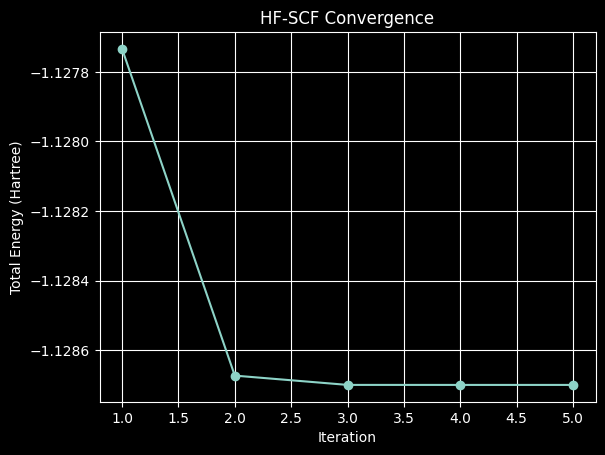

Ground state energy for Hydrogen (H₂): -1.128700093556442 Hartree


In [28]:
# Visualization of calculation process (Hartree-Fock)
mf = scf.RHF(mol)                         # Set method
conv_data = []                            # Store convergence data
def callback(envs):                       # Callback function to collect convergence information
    conv_data.append(envs['e_tot'])       # Captures energy values at each iteration to track process
mf.callback = callback                    # Set callback directly on the mf object
energy = mf.kernel()                      # Perform HF calculation
energies = conv_data                      # Extract energy values
iterations = range(1, len(energies) + 1)  # Extract iteration numbers
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()
print(f"Ground state energy for {molecule}: {energy} Hartree")

In [29]:
# HF-SCF Core Hamiltonian matrix

# Core Hamiltonian matrix represents one-electron part of molecular Hamiltonian
# = kinetic energy operator of electrons and electrostatic attraction operator between electrons and nuclei
# Core Hamiltonian does not include electron-electron interactions

# Get the core Hamiltonian (kinetic + nuclear attraction)
core_hamiltonian = mf.get_hcore()
print("Core Hamiltonian matrix (Hcore):\n", core_hamiltonian)

Core Hamiltonian matrix (Hcore):
 [[-1.09365291 -0.87874741  0.          0.         -0.26187631 -0.8973863
  -0.7763343   0.          0.          0.5713283 ]
 [-0.87874741 -0.85447825  0.          0.         -0.19773038 -0.7763343
  -0.80192808  0.          0.          0.32714754]
 [ 0.          0.          0.31720825  0.          0.          0.
   0.         -0.14254149  0.          0.        ]
 [ 0.          0.          0.          0.31720825  0.          0.
   0.          0.         -0.14254149  0.        ]
 [-0.26187631 -0.19773038  0.          0.          0.06743292 -0.5713283
  -0.32714754  0.          0.         -0.25821409]
 [-0.8973863  -0.7763343   0.          0.         -0.5713283  -1.09365291
  -0.87874741  0.          0.          0.26187631]
 [-0.7763343  -0.80192808  0.          0.         -0.32714754 -0.87874741
  -0.85447825  0.          0.          0.19773038]
 [ 0.          0.         -0.14254149  0.          0.          0.
   0.          0.31720825  0.          0.   

In [30]:
# HF-SCF Fock Matrix

# Fock matrix approximates many-electron wavefunction of system (H₂O),
# i.e. approximates interactions between electrons in a system to find an optimal set of orbitals.
# It gives snapshot of molecule electronic structure, incl. energies of molecular orbitals and how they interact or mix

# Get the Fock matrix (core Hamiltonian + electron-electron interaction terms)
fock_matrix = mf.get_fock()
print("Fock Matrix (Hartree-Fock Hamiltonian):\n", fock_matrix)

Fock Matrix (Hartree-Fock Hamiltonian):
 [[-0.26952032 -0.4694773   0.          0.         -0.29232224 -0.57287415
  -0.47752309  0.          0.          0.01409051]
 [-0.4694773  -0.28525187  0.          0.         -0.23467174 -0.47752309
  -0.30857326  0.          0.          0.21190859]
 [ 0.          0.          1.48384683  0.          0.          0.
   0.          0.44417828  0.          0.        ]
 [ 0.          0.          0.          1.48384683  0.          0.
   0.          0.          0.44417828  0.        ]
 [-0.29232224 -0.23467174  0.          0.          1.20567488 -0.01409051
  -0.21190859  0.          0.         -0.56096308]
 [-0.57287415 -0.47752309  0.          0.         -0.01409051 -0.26952032
  -0.4694773   0.          0.          0.29232224]
 [-0.47752309 -0.30857326  0.          0.         -0.21190859 -0.4694773
  -0.28525187  0.          0.          0.23467174]
 [ 0.          0.          0.44417828  0.          0.          0.
   0.          1.48384683  0.      

In [31]:
print("Fock Matrix Shape:", fock_matrix.shape)
print("Fock Matrix Size:", fock_matrix.size)
print("Fock Matrix Dimension:", fock_matrix.ndim)
print("Fock Matrix Trace:", np.trace(fock_matrix))
print("Fock Matrix Determinant:", np.linalg.det(fock_matrix))
print("Fock Matrix Rank:", np.linalg.matrix_rank(fock_matrix))

Fock Matrix Shape: (10, 10)
Fock Matrix Size: 100
Fock Matrix Dimension: 2
Fock Matrix Trace: 7.237192699539287
Fock Matrix Determinant: -0.007862787895686322
Fock Matrix Rank: 10


*For Water (H2O):*

* **Shape**: corresponds to 24 basis functions (molecular orbitals) used to describe water molecule (H₂O) = 1s orbitals of the hydrogen atoms + oxygen atom's $2s, 2p_x, 2p_y$, and $2p_z$ orbitals + additional basis functions from higher-order functions like polarization or diffuse functions depending on theory or basis set (e.g., STO-3G, 6-31G, etc.)
* **Size**: 24 x 24 = 576. All interactions between 24 orbitals (both diagonal and off-diagonal). Represent pairwise interactions between orbitals as N x N matrix. Each element $F_ij$ corresponds to interaction between orbital i and orbital j.
* **Trace**: diagonal elements correspond to one-electron energies of molecular orbitals. In stable molecule like water, most electrons occupy bound molecular orbitals with negative energies (relative to free electron), hence a negative trace. Magnitude of trace depends on the specific molecular orbitals' energy levels, which are influenced by the electron-nuclear and electron-electron interactions in the Hartree-Fock approximation.
* **Rank**: = number of linearly independent rows or columns. Rank is 24 (equal to number of rows/columns) = all 24 molecular orbitals are linearly independent, none redundant - expected in Hartree-Fock calculation where each basis function represents a unique molecular orbital.
* **Determinant**: insights into matrix's invertibility and system's stability.
  * A determinant close to zero (but not exactly zero) typically suggests that the matrix is close to being singular, meaning it is almost non-invertible. This could imply that some of the molecular orbitals are nearly degenerate or that the system is on the verge of instability.
  * A negative determinant indicates a specific symmetry property or interaction of the molecular orbitals, but the exact physical meaning is more abstract in this context.
  * -0.38 suggests that there are significant interactions between orbitals, but system remains stable, as determinant is not zero.


In [32]:
# HF-SCF Molecular Orbital Coefficients for All Orbitals (occupied and unoccupied)

# Retrieve Hartree-Fock orbitals (related to the Slater determinant) - occupied and unoccupied
# Occupied orbitals: contain electrons in Hartree-Fock ground state
# Virtual orbitals: unoccupied in ground state but can be important for excited state or post-Hartree-Fock methods like MP2 or CISD (electronic correlation effects)

# Requires perform a Hartree-Fock calculation
# mf = scf.RHF(mol)
# mf.kernel()

# Get the molecular orbitals (which form the Slater determinant)
mo_coeff = mf.mo_coeff  # Coefficients of the molecular orbitals in the atomic basis
mo_energy = mf.mo_energy  # Orbital energies

print("Molecular Orbital Coefficients (MO coefficients):\n", mo_coeff)
print("Molecular Orbital Energies:\n", mo_energy)

Molecular Orbital Coefficients (MO coefficients):
 [[ 0.40366476  0.15024403 -0.70010768 -0.76067424  0.          0.
  -0.44372807  0.          0.          2.68617997]
 [ 0.17376287  1.95865624  0.7263728   1.6173428   0.          0.
   0.22106467  0.          0.          0.05058434]
 [ 0.          0.          0.          0.          0.          0.57904425
   0.          0.99134997  0.          0.        ]
 [ 0.          0.          0.          0.          0.57904425  0.
   0.          0.          0.99134997  0.        ]
 [ 0.02249745  0.01425354 -0.0112663   0.41021821  0.          0.
   0.72690133  0.          0.          2.02675347]
 [ 0.40366476 -0.15024403 -0.70010768  0.76067424  0.          0.
  -0.44372807  0.          0.         -2.68617997]
 [ 0.17376287 -1.95865624  0.7263728  -1.6173428   0.          0.
   0.22106467  0.          0.         -0.05058434]
 [ 0.          0.          0.          0.          0.          0.57904425
   0.         -0.99134997  0.          0.       

In [33]:
# HF-SCF Molecular Orbital Coefficients for only occupied orbitals

# Extract and display the occupied molecular orbitals - used to construct Slater determinant - Only occupied orbitals

# The mo_occ variable stores the occupation numbers, which are usually 2 for occupied orbitals
# in a closed-shell Hartree-Fock calculation (since there are two electrons per orbital in a closed-shell system).

# By identifying which orbitals are occupied using np.where(mo_occ > 0),
# the code extracts the coefficients corresponding to those occupied orbitals and prints them.

# Perform a Hartree-Fock calculation
# mf = scf.RHF(mol)
# mf.kernel()

# Get the molecular orbital coefficients
mo_coeff = mf.mo_coeff

# Get the occupation numbers (2 for occupied orbitals in closed-shell RHF)
mo_occ = mf.mo_occ

# Identify the indices of occupied orbitals
occupied_indices = np.where(mo_occ > 0)[0]

# Extract the coefficients of the occupied molecular orbitals
occupied_mo_coeff = mo_coeff[:, occupied_indices]

print("Occupied Molecular Orbital Coefficients:")
print(occupied_mo_coeff)

Occupied Molecular Orbital Coefficients:
[[ 0.40366476]
 [ 0.17376287]
 [ 0.        ]
 [ 0.        ]
 [ 0.02249745]
 [ 0.40366476]
 [ 0.17376287]
 [ 0.        ]
 [ 0.        ]
 [-0.02249745]]


##### *Density Functional (DFT-SCF with Kohn-Sham)*

In [21]:
# Ground State Energy with DFT (Kohn-Sham)
# Perform a DFT calculation using the B3LYP functional

# dft.RKS for Restricted Kohn-Sham DFT appropriate for a closed-shell system (like water)
mf = dft.RKS(mol)

# Exchange-correlation functional is set using mf.xc = 'b3lyp' (popular hybrid functional)
mf.xc = 'B3LYP'    # Exchange-correlation functional

# mf.kernel() function performs actual DFT calculation and returns energy
mf.kernel()

converged SCF energy = -1.17328112090857


np.float64(-1.173281120908572)

In [22]:
# DFT-SCF  Kohn-Sham Hamiltonian (First Quantization) includes exchange-correlation potential, which approximates exchange and correlation effects
# Kohn-Sham formalism transforms complex many-electron problem into a simpler set of equations that describe non-interacting electrons
# but in presence of an effective potential that accounts for the effects of electron-electron interactions.

# Get the Kohn-Sham Hamiltonian (core Hamiltonian + exchange-correlation potential)
ks_hamiltonian = mf.get_hcore() + mf.get_veff()

print("Kohn-Sham Hamiltonian matrix:\n", ks_hamiltonian)

Kohn-Sham Hamiltonian matrix:
 [[-2.09806815e-01 -3.47338931e-01  6.93889390e-18  1.38777878e-17
  -1.92848152e-01 -4.04898835e-01 -3.36157374e-01  0.00000000e+00
   0.00000000e+00  3.45602668e-02]
 [-3.47338931e-01 -2.13556575e-01  0.00000000e+00 -6.93889390e-18
  -1.49603932e-01 -3.36157374e-01 -2.24561957e-01 -2.77555756e-17
  -1.04083409e-17  1.53804087e-01]
 [ 6.93889390e-18  0.00000000e+00  1.23446963e+00 -1.82641465e-18
   9.10729825e-18  3.46944695e-18  1.73472348e-17  3.29646425e-01
   8.30812639e-18  1.73472348e-17]
 [ 1.38777878e-17 -6.93889390e-18 -1.82641465e-18  1.23446963e+00
  -8.67361738e-19  1.04083409e-17 -3.46944695e-18  8.68558545e-18
   3.29646425e-01  1.38777878e-17]
 [-1.92848152e-01 -1.49603932e-01  9.10729825e-18 -8.67361738e-19
   9.94853139e-01 -3.45602668e-02 -1.53804087e-01 -6.93889390e-18
  -6.93889390e-18 -5.20251591e-01]
 [-4.04898835e-01 -3.36157374e-01  3.46944695e-18  1.04083409e-17
  -3.45602668e-02 -2.09806815e-01 -3.47338931e-01 -1.38777878e-17
  

In [23]:
print("Kohn-Sham Hamiltonian Matrix Shape:", ks_hamiltonian.shape)
print("Kohn-Sham Hamiltonian Matrix Size:", ks_hamiltonian.size)
print("Kohn-Sham Hamiltonian Matrix Dimension:", ks_hamiltonian.ndim)
print("Kohn-Sham Hamiltonian Matrix Trace:", np.trace(ks_hamiltonian))
print("Kohn-Sham Hamiltonian Matrix Determinant:", np.linalg.det(ks_hamiltonian))
print("Kohn-Sham Hamiltonian Matrix Rank:", np.linalg.matrix_rank(ks_hamiltonian))

Kohn-Sham Hamiltonian Matrix Shape: (10, 10)
Kohn-Sham Hamiltonian Matrix Size: 100
Kohn-Sham Hamiltonian Matrix Dimension: 2
Kohn-Sham Hamiltonian Matrix Trace: 6.08085800033746
Kohn-Sham Hamiltonian Matrix Determinant: -0.00043849081832920506
Kohn-Sham Hamiltonian Matrix Rank: 10


##### *Coupled Cluster (Post Hartree Fock)*

Very accurate (often considered the "gold standard" for single-reference methods). CCSD (singles and doubles), CCSD(T) (includes perturbative triples). CCSD(T) is highly accurate but scales poorly with system size. <font color="blue">*Almost exclusively formulated and implemented in second quantization due to its complexity.*</font>

In [40]:
# Ground State Energy with Coupled Cluster (Post Hartree Fock)
mf = scf.RHF(mol)                  # Perform a HF-SCF calculation to obtain the reference wavefunction
hf_energy = mf.kernel()
ccsd_calc = cc.CCSD(mf)            # Perform a Coupled Cluster calculation
ccsd_energy = ccsd_calc.kernel()
ccsd_t_energy = ccsd_calc.ccsd_t() # (Optional) Include perturbative triple excitations (CCSD(T))

# Ensure that ccsd_t_energy is a scalar (take the first element if it's an array)
if isinstance(ccsd_t_energy, (list, tuple)) or hasattr(ccsd_t_energy, "__len__"):
    ccsd_t_energy = ccsd_t_energy[0]  # Take the first value if it returns multiple results

# Print the results
print(f"HF-SCF energy: {hf_energy} Hartree")
print(f"CCSD energy: {ccsd_energy} Hartree")
#print(f"CCSD(T) energy: {ccsd_energy + ccsd_t_energy} Hartree")

converged SCF energy = -1.12870009355644
E(CCSD) = -1.163374496404819  E_corr = -0.03467440284837744
CCSD(T) correction = 2.05277245749947e-19
HF-SCF energy: -1.1287000935564415 Hartree
CCSD energy: (np.float64(-0.034674402848377445), array([[ 2.76792009e-17, -5.97110968e-03, -2.86165503e-16,
         0.00000000e+00,  0.00000000e+00, -4.15377664e-03,
         0.00000000e+00,  0.00000000e+00,  1.61168554e-16]]), array([[[[-5.34108771e-02,  6.11381298e-17,  4.71221663e-02,
           0.00000000e+00,  0.00000000e+00,  1.58720336e-17,
           0.00000000e+00,  0.00000000e+00, -6.09039779e-03],
         [ 6.11381298e-17, -5.07200622e-02, -3.14505182e-17,
           0.00000000e+00,  0.00000000e+00,  1.41940469e-02,
           0.00000000e+00,  0.00000000e+00,  7.77801798e-17],
         [ 4.71221663e-02, -3.14505182e-17, -5.31524971e-02,
           0.00000000e+00,  0.00000000e+00, -6.55390473e-18,
           0.00000000e+00,  0.00000000e+00,  1.04839327e-02],
         [ 0.00000000e+00,  0.000

##### *Møller-Plesset Perturbation Theory (Post Hartree Fock)*

In [11]:
# Ground State Energy with Møller-Plesset Perturbation Theory (Post Hartree Fock)
mf = scf.RHF(mol)
mf.kernel()
mp2 = mp.MP2(mf) # MP2 single point energy calculation
energy_mp2 = mp2.kernel()
print(f"MP2 energy: {energy_mp2[0]} Hartree")

converged SCF energy = -1.12870009355644
E(RMP2) = -1.15507165119134  E_corr = -0.0263715576348956
E(SCS-RMP2) = -1.16034596271832  E_corr = -0.0316458691618748
MP2 energy: -0.02637155763489563 Hartree


##### *Configuration Interaction (Post Hartree Fock)*

In [38]:
from pyscf import tdscf  # For CIS calculations (using TDHF)
from pyscf import ci     # For CISD calculations
from pyscf import fci    # For FCI calculations

# Step 1: Perform a HF-SCF calculation to obtain the reference wavefunction
mf = scf.RHF(mol)
hf_energy = mf.kernel()
print(f"HF-SCF energy: {hf_energy:.8f} Hartree")

# Step 2: Perform Configuration Interaction calculations

# CIS (Using TDHF which is equivalent to CIS for singlet excited states)
cis_calc = tdscf.TDA(mf)  # TDA approximation is equivalent to CIS
cis_e, cis_v = cis_calc.kernel()
cis_energy = cis_e[0] + hf_energy  # First excited state energy

# CISD
cisd_calc = ci.CISD(mf)
cisd_energy = cisd_calc.kernel()[0]  # Get the ground state energy

# FCI - Note: This can be very computationally expensive
cisolver = fci.FCI(mf)
fci_energy = cisolver.kernel()[0]

# Print the results
print(f"Molecule: {molecule}")
print(f"Basis Set: {mol.basis}")
print(f"HF-SCF energy: {hf_energy:.8f} Hartree")
print(f"CIS excited state energy: {cis_energy:.8f} Hartree")
print(f"CIS excitation energy: {cis_e[0]:.8f} Hartree")
print(f"CISD correlation energy: {cisd_energy - hf_energy:.8f} Hartree")
print(f"CISD total energy: {cisd_energy:.8f} Hartree")
print(f"FCI correlation energy: {fci_energy - hf_energy:.8f} Hartree")
print(f"FCI total energy: {fci_energy:.8f} Hartree")

# Analyze the CISD wavefunction
cisd_coeff = cisd_calc.ci
print("\nCISD Wavefunction Analysis:")
print(f"Reference determinant weight: {cisd_coeff[0]**2:.6f}")

# Calculate contributions from singles and doubles
#from pyscf.ci import cisd_slow
nelec = mol.nelectron
nocc = nelec // 2
nvir = mf.mo_coeff.shape[1] - nocc

# Get singles and doubles contribution
singles_norm = 0
doubles_norm = 0

# Singles contribution
singles_norm = sum(abs(cisd_coeff[i])**2 for i in range(1, nocc*nvir+1))

# Doubles contribution
doubles_norm = sum(abs(cisd_coeff[i])**2 for i in range(nocc*nvir+1, len(cisd_coeff)))

print(f"Singles contribution: {singles_norm:.6f}")
print(f"Doubles contribution: {doubles_norm:.6f}")
print(f"Total normalization check: {cisd_coeff[0]**2 + singles_norm + doubles_norm:.6f}")

converged SCF energy = -1.12870009355644
HF-SCF energy: -1.12870009 Hartree
Excited State energies (eV)
[14.07567057 21.45479287 32.30709355]
E(RCISD) = -1.163374490318234  E_corr = -0.03467439676179215
Molecule: Hydrogen (H₂)
Basis Set: cc-pvdz
HF-SCF energy: -1.12870009 Hartree
CIS excited state energy: -0.61142874 Hartree
CIS excitation energy: 0.51727136 Hartree
CISD correlation energy: 1.09402570 Hartree
CISD total energy: -0.03467440 Hartree
FCI correlation energy: -0.03467440 Hartree
FCI total energy: -1.16337449 Hartree

CISD Wavefunction Analysis:
Reference determinant weight: 0.983138
Singles contribution: 0.000052
Doubles contribution: 0.016758
Total normalization check: 0.999948


* CIS calculation: PySCF doesn't have a direct ci.CIS module. Instead, we use the Time-Dependent Hartree-Fock (TDHF) approach with the Tamm-Dancoff Approximation (TDA), which is equivalent to CIS for excited states.
* Wavefunction analysis: this is a simplified analysis of the CISD wavefunction by directly summing over the appropriate coefficients.

This script performs:

1. Hartree-Fock (HF) calculation as the reference
2. Configuration Interaction Singles (CIS)
3. Configuration Interaction Singles and Doubles (CISD)
4. Full Configuration Interaction (FCI) - note this is very computationally expensive

The code also analyzes the CISD wavefunction to show the contributions from the reference determinant, single excitations, and double excitations.

A few important notes:
- **CIS is primarily used for excited states, not ground state correlation energy (the first excited state energy is reported)**
- CISD includes single and double excitations and is commonly used for ground state calculations
- FCI is the exact solution within the given basis set but scales factorially with system size
- For larger molecules, you may want to use truncated CI methods or other approaches like CASCI (Complete Active Space CI)

Would you like me to explain any specific part of this code in more detail?

##### *Geometry Optimization (HF or DFT)*

In [19]:
# Geometry Optimization (in Angstroms) with HF or DFT
from pyscf import gto, dft
from pyscf.geomopt.geometric_solver import optimize

# Define the molecule with a rough guess for geometry (initial atomic positions)
# These positions don't need to be exact, as the optimization will refine them
mol.atom = mol.atom
mol.basis = mol.basis
mol.build()

# Take molecule including basis set defined from `mol.build()`
mf = dft.RKS(mol)     # Perform geometry optimization using DFT (Restricted Kohn-Sham)
mf.xc = 'b3lyp'       # Define the exchange-correlation functional
mol_eq = optimize(mf)

# Print optimized coordinates. This geometry corresponds to lowest energy configuration found during optimization process
print("Optimized Geometry (in Angstroms):")
print(mol_eq.atom_coords())

geometric-optimize called with the following command line:
/usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-49853516-0dc6-43f3-9ece-ad47300453bd.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   H   0.000000   0.000000   0.740000    0.000000  0.000000  0.000000

WARN: Unable to to identify input symmetry using original axes.
Different symmetry axes will be used.


WARN: Mole.unit (angstrom) is changed to Bohr

converged SCF energy = -1.17328112090857
--------------- SymAdaptedRKS_Scanner gradients ---------------
         x                y                z
0 H     0.0000000000     0.0000000000     0.0159964150
1 H     0.0000000000     0.0000000000    -0.0159964150
----------------------------------------------
cycle 1: E = -1.17328112091  dE = -1.17328  norm(grad) = 0.0226223


Step    0 : Gradient = 1.600e-02/1.600e-02 (rms/max) Energy = -1.1732811209
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 3.91394e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.000000   0.000000  -0.010814    0.000000  0.000000  0.359186
   H   0.000000   0.000000   0.750814    0.000000  0.000000  0.380814
converged SCF energy = -1.17360206558998
--------------- SymAdaptedRKS_Scanner gradients ---------------
         x                y                z
0 H     0.0000000000     0.0000000000     0.0000664006
1 H     0.0000000000     0.0000000000    -0.0000664006
----------------------------------------------
cycle 2: E = -1.17360206559  dE = -0.000320945  norm(grad) = 9.39046e-05


Step    1 : Displace = 1.081e-02/1.081e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 6.640e-05/6.640e-05 (rms/max) E (change) = -1.1736020656 (-3.209e-04) Quality = 0.982
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 3.89770e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.000000   0.000000  -0.010859    0.000000  0.000000  0.369955
   H   0.000000   0.000000   0.750859    0.000000  0.000000  0.370045
converged SCF energy = -1.17360207162442
--------------- SymAdaptedRKS_Scanner gradients ---------------
         x                y                z
0 H     0.0000000000     0.0000000000     0.0000045661
1 H     0.0000000000     0.0000000000    -0.0000045661
----------------------------------------------
cycle 3: E = -1.17360207162  dE = -6.03443e-09  norm(grad) = 6.45747e-06


Step    2 : Displace = 4.507e-05/4.507e-05 (rms/max) Trust = 1.414e-01 (+) Grad = 4.566e-06/4.566e-06 (rms/max) E (change) = -1.1736020716 (-6.034e-09) Quality = 1.067
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 3.89770e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 2.637 seconds


Optimized Geometry (in Angstroms):
[[ 0.          0.         -0.71971902]
 [ 0.          0.          0.71971902]]


##### *Calculate excited electronic states*

In [13]:
# Calculate excited electronic states
myhf = scf.RHF(mol).run()     # Perform a ground-state calculation
mytd = tddft.TDA(myhf).run()  # Excited-state calculation using TDDFT
#mol = gto.M(verbose = 4)     # Add verbose for more details
mytd.analyze()

converged SCF energy = -1.12870009355644
Excited State energies (eV)
[14.07567057 21.45479287 32.30709355]

** Singlet excitation energies and oscillator strengths **
Excited State   1:  A1u     14.07567 eV     88.08 nm  f=0.6152
Excited State   2:  A1g     21.45479 eV     57.79 nm  f=0.0000
Excited State   3:  A1u     32.30709 eV     38.38 nm  f=0.2024


##### *Emission and Absorption Spectra*

converged SCF energy = -342.467159633133


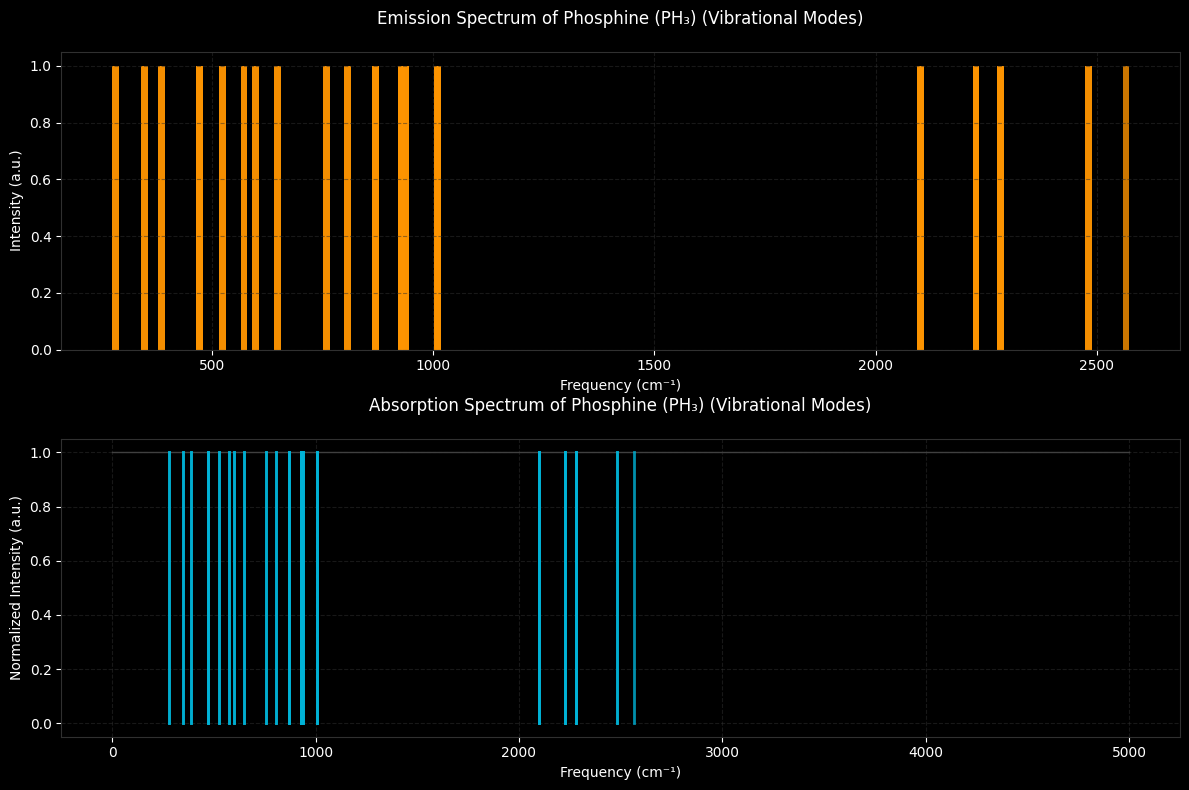

In [44]:
# Emission and Absorption Spectra (Electronic Frequencies / Transitions)

mf = scf.RHF(mol)                                     # Perform a ground-state calculation for molecular vibrational frequencies
mf.kernel()
hess = hessian.RHF(mf).kernel()                       # Calculate the Hessian matrix (force constants)
frequencies = np.linalg.eigvalsh(hess)                # Diagonalize the Hessian to get vibrational frequencies
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Filter out non-physical (imaginary) frequencies and limit to realistic range

# Plot stlyes
EMISSION_COLOR = '#ff9500'  # Bright orange
ABSORPTION_COLOR = '#00b4d8'  # Bright blue
BASELINE_COLOR = '#404040'  # Dark gray
GRID_COLOR = '#303030'  # Slightly lighter gray for grid
plt.figure(figsize=(12, 8), facecolor='black') # Create figure with dark background
plt.style.use('dark_background') # Set the style to dark background

# Emission Spectrum
plt.subplot(2, 1, 1)
plt.bar(frequencies, height=1.0, width=15.0, color=EMISSION_COLOR, alpha=0.8)
plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Emission Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Absorption Spectrum
plt.subplot(2, 1, 2)
# Create baseline
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000),
         color=BASELINE_COLOR, linewidth=1)

# Plot absorption lines with gradient effect
for freq in frequencies:
    y = np.linspace(0, 1, 100)
    x = np.ones_like(y) * freq
    plt.plot(x, y, color=ABSORPTION_COLOR,
            alpha=0.8, linewidth=2)

plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Normalized Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Absorption Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Set figure background to black
plt.gcf().patch.set_facecolor('black')

plt.show()

##### *Theoretical Electronic Energy Levels*

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.1/811.1 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.6/31.6 MB 52.5 MB/s eta 0:00:00


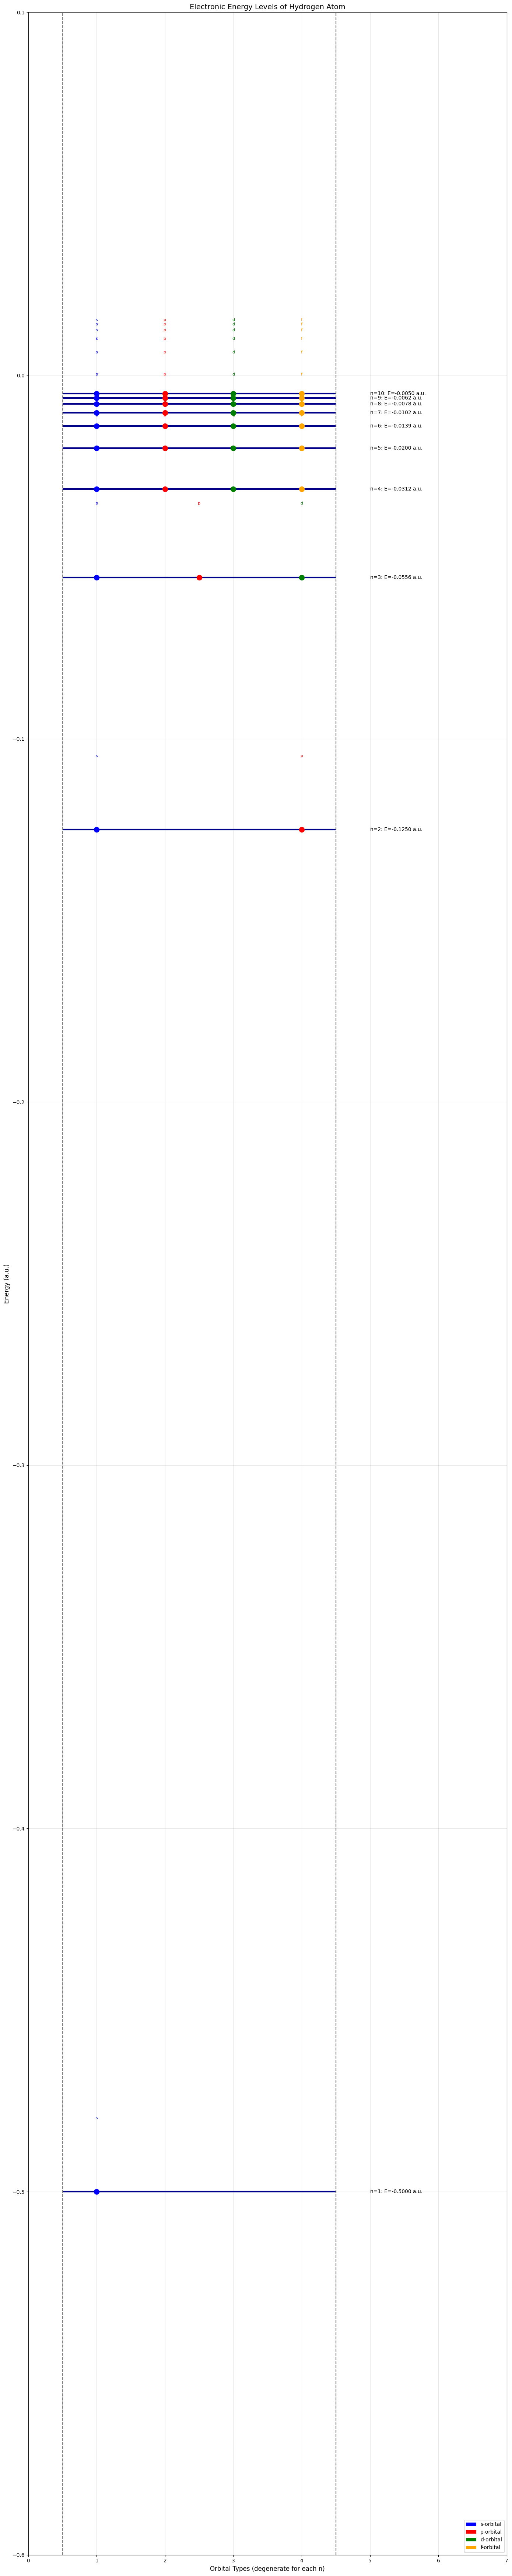

Energy levels of Hydrogen atom (in atomic units):
n=1: E = -0.500000 a.u. = -13.6057 eV
  Degeneracy: 1 (includes 1 orbital types)
  Orbitals: 1s

n=2: E = -0.125000 a.u. = -3.4014 eV
  Degeneracy: 4 (includes 2 orbital types)
  Orbitals: 2s, 2p

n=3: E = -0.055556 a.u. = -1.5117 eV
  Degeneracy: 9 (includes 3 orbital types)
  Orbitals: 3s, 3p, 3d

n=4: E = -0.031250 a.u. = -0.8504 eV
  Degeneracy: 16 (includes 4 orbital types)
  Orbitals: 4s, 4p, 4d, 4f

n=5: E = -0.020000 a.u. = -0.5442 eV
  Degeneracy: 25 (includes 5 orbital types)
  Orbitals: 5s, 5p, 5d, 5f, 5higher

n=6: E = -0.013889 a.u. = -0.3779 eV
  Degeneracy: 36 (includes 6 orbital types)
  Orbitals: 6s, 6p, 6d, 6f, 6higher, 6higher

n=7: E = -0.010204 a.u. = -0.2777 eV
  Degeneracy: 49 (includes 7 orbital types)
  Orbitals: 7s, 7p, 7d, 7f, 7higher, 7higher, 7higher

n=8: E = -0.007812 a.u. = -0.2126 eV
  Degeneracy: 64 (includes 8 orbital types)
  Orbitals: 8s, 8p, 8d, 8f, 8higher, 8higher, 8higher, 8higher

n=9: E = -0.00

In [16]:
# Theoretical Electronic Energy Levels of Hydrogen (H)
!pip install periodictable qutip -q
import numpy as np
import matplotlib.pyplot as plt
import periodictable as pt
from typing import Dict, Optional

# Constants for Hydrogen (H)
Z = 1  # Nuclear charge for hydrogen
n_max = 10  # Maximum principal quantum number

# Define the Hamiltonian for hydrogen atom
def hydrogen_hamiltonian(Z, n_max):
    """
    Calculate energy levels for hydrogen atom using the Bohr model
    E_n = -Z^2 / (2 * n^2) in atomic units
    """
    energies = []
    n_values = []
    for n in range(1, n_max + 1):
        energy_n = -Z**2 / (2 * n**2)
        energies.append(energy_n)
        n_values.append(n)
    return np.array(n_values), np.array(energies)

# Calculate the energy levels
n_values, energy_levels = hydrogen_hamiltonian(Z, n_max)

# Plot the energy levels
plt.figure(figsize=(14, 70))

# For hydrogen, all orbitals with the same n have the same energy (no l-dependence)
# We'll show the degeneracy by plotting multiple lines for each n
colors = ['blue', 'red', 'green', 'orange']
orbital_types = ['s', 'p', 'd', 'f']

for i, (n, energy) in enumerate(zip(n_values, energy_levels)):
    # Plot the energy level
    plt.hlines(energy, xmin=0.5, xmax=4.5, color='darkblue', lw=3)

    # Show the degenerate orbitals available at each n
    x_positions = np.linspace(1, 4, min(n, 4))
    for j in range(min(n, 4)):
        if j < n:  # orbital exists for this n
            plt.scatter(x_positions[j], energy, color=colors[j], s=100, zorder=5)
            plt.text(x_positions[j], energy + 0.02, orbital_types[j],
                    ha='center', fontsize=8, color=colors[j])

    # Label the energy level
    plt.text(5, energy, f'n={n}: E={energy:.4f} a.u.',
            va='center', fontsize=10)

# Add vertical lines to separate n levels visually
for n in range(1, n_max + 1):
    plt.axvline(x=0.5, color='gray', linestyle='--', alpha=0.3)
    plt.axvline(x=4.5, color='gray', linestyle='--', alpha=0.3)

plt.xlim(0, 7)
plt.ylim(min(energy_levels) - 0.1, 0.1)
plt.xlabel('Orbital Types (degenerate for each n)', fontsize=12)
plt.ylabel('Energy (a.u.)', fontsize=12)
plt.title('Electronic Energy Levels of Hydrogen Atom', fontsize=14)
plt.grid(True, alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], label=f'{orbital_types[i]}-orbital')
                  for i in range(4)]
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

# Print energy levels
print("Energy levels of Hydrogen atom (in atomic units):")
print("=" * 50)
for n, energy in zip(n_values, energy_levels):
    print(f"n={n}: E = {energy:.6f} a.u. = {energy * 27.2114:.4f} eV")
    # Show degeneracy
    degeneracy = n**2
    print(f"  Degeneracy: {degeneracy} (includes {n} orbital types)")
    orbitals = []
    for l in range(n):
        orbitals.append(f"{n}{orbital_types[l] if l < 4 else 'higher'}")
    print(f"  Orbitals: {', '.join(orbitals)}")
    print()

# Calculate and display some important transitions
print("\nImportant Transitions:")
print("=" * 50)
# Lyman series (n -> 1)
print("Lyman series (UV, n → 1):")
for n_upper in range(2, 5):
    wavelength = 1 / (Z**2 * (1/1**2 - 1/n_upper**2)) * 91.127  # nm
    print(f"  n={n_upper} → n=1: λ = {wavelength:.2f} nm")

# Balmer series (n -> 2)
print("\nBalmer series (Visible, n → 2):")
for n_upper in range(3, 7):
    wavelength = 1 / (Z**2 * (1/2**2 - 1/n_upper**2)) * 91.127  # nm
    print(f"  n={n_upper} → n=2: λ = {wavelength:.2f} nm")

Hydrogen is much simpler than an element like calcium since it only has one electron and no quantum defects:The key differences between hydrogen and calcium:

1. **No Quantum Defects**: Hydrogen is a one-electron atom, so there are no electron-electron interactions or screening effects. The energy depends only on the principal quantum number n.

2. **Degeneracy**: For hydrogen, all orbitals with the same n have the same energy (s, p, d, f are degenerate). This is different from multi-electron atoms like calcium.

3. **Exact Solution**: The hydrogen atom has an exact analytical solution: E_n = -Z²/(2n²) in atomic units, where Z=1 for hydrogen.

4. **Energy Scale**: The energies are more negative (more tightly bound) compared to calcium's outer electrons because there's no shielding.

The code also calculates some important spectral series:
- **Lyman series**: Transitions to n=1 (UV region)
- **Balmer series**: Transitions to n=2 (visible region)

> <font color="blue">**These are the emission lines you'd see when hydrogen atoms transition between energy levels, which is how we originally discovered quantum mechanics!**